Часть очевидных наблюдений от меня 
Исчерпывающий анализ от: https://alexanderdyakonov.wordpress.com/2016/10/14/data-science-contest-сбербанка/ 


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.cluster import KMeans 
%matplotlib inline

types и codes -- примеры словарей, с которых нужно начинать предобработку

In [3]:
data = pd.read_csv("transactions.csv")
types = pd.read_csv("tr_types.csv")
gender = pd.read_csv("customers_gender_train.csv")
ru_codes = pd.read_csv("tr_mcc_codes.csv", delimiter=';') 
codes = pd.read_csv("mcc_codes.csv", index_col='mcc') #коды на английском для word2vec

Оверкилл: взять обученный дамп googlenews 

3000000 слов в словаре и 300 координат

In [5]:
w2v_model = Word2Vec.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)
print(len(w2v_model.vocab))
w2v_model.init_sims(replace=True)


3000000


Возможный сюжет: если в словаре категориальные признаки -- обычные слова/текст/метки, применить к ним векторизацию. Далее выделять кластеры/категории (в предположении, что связь существует) или другие пространственные закономерности.

Наверно очень важно выбрать правильную размерность (применять PCA?), т.к. при больших d -- могут возникать нежелательные метрические эффекты (хотя наверняка есть какие-то общепринятые эвристики на этот счёт)

Расстояние <code>w2v.similarity(a, b)</code> для одинаковых слов и разных размерностей -- не одно и то же (Верно ли?)

...

In [10]:
codes.fillna('0', inplace=True)
words = codes.irs_description.apply(lambda x: x.split())
words = words.values
words = words.tolist()
words = [item for sublist in words for item in sublist]
words = [word.lower() for word in words]
words = [word.replace("(", "") for word in words] 
words = [word.replace("'", "") for word in words] 
words = [word.replace(")", "") for word in words] 
words = [word.replace("’", "") for word in words] 
words = [word.replace(",", "") for word in words] 
words = [word.replace("-", "") for word in words] 
words = [word.replace("/", " ") for word in words] 
words = [word.split() for word in words] 
words = [item for sublist in words for item in sublist]
words = list(set(words))

In [37]:
words
vecs = []
for i in words:
    if i not in w2v_model.vocab:
        del i
    else:
        vecs.append(w2v_model[i])



In [105]:
km = KMeans()
m = km.fit_transform(vecs)
cluster_labels = km.labels_
for i, x in enumerate(cluster_labels):
    print(x, words[i], end=' \t')


    

7 recreational 	0 telephone 	6 parts 	5 stationary 	5 photography 	5 publishing 	6 shoe 	3 professional 	3 managers 	6 plaster 	7 special 	3 disburse 	4 cosmetic 	6 window 	3 real 	3 public 	3 production 	5 automated 	7 music 	0 passenger 	5 books 	3 buying 	2 accessory 	0 fuel 	1 hotels 	1 orchestras 	3 combination 	5 graphics 	7 home 	3 agents 	1 florists 	6 repairs 	2 storage 	3 long 	6 carpentry 	6 refinishing 	3 marketing 	3 court 	1 theaters 	7 sports 	5 typesetting 	1 carriers 	3 readytowear 	2 storesmusical 	1 bail 	7 equipment 	6 departments 	3 civic 	3 wires 	3 nonfi 	2 payments 	1 only 	0 discount 	3 appliances 	3 aquariums 	7 tour 	6 service 	3 betting 	2 lots 	0 glass 	2 secondary 	1 automobile 	4 flying 	3 sundries 	0 restaurants 	2 tele 	3 attorneys 	7 travel 	1 specialty 	6 moving 	3 estate 	5 parks 	3 laundry 	3 intracompany 	0 secretarial 	3 cooperative 	2 fees 	4 bridge 	2 costs 	6 supplies 	3 osteopaths 	0 electronics 	5 varnishes 	0 trade 	7 yards 	2 piece 	1 cable

In [ ]:
#tf = TfidfVectorizer() -- Здесь неактуально, но имеет смысл выкидывать слова-шум

In [55]:
transactions = data
transactions = pd.merge(transactions, gender, on='customer_id', how='outer')
transactions['num_day'] = transactions['tr_datetime'].apply(lambda x: int(x.split(' ')[0]))
transactions['datetime'] = transactions['tr_datetime'].apply(lambda x: x.split(' ')[1])
transactions['hour'] = transactions['datetime'].apply(lambda x: int(x.split(':')[0]))
transactions['minute'] = transactions['datetime'].apply(lambda x: int(x.split(':')[1]))
transactions['second'] = transactions['datetime'].apply(lambda x: int(x.split(':')[2]))
del transactions['tr_datetime']
transactions.head()

,customer_id,mcc_code,tr_type,amount,term_id,gender,num_day,datetime,hour,minute,second
0,39026145,4814,1030,-2245.92,NaN,1.0,0,10:23:26,10,23,26
1,39026145,6011,7010,56147.89,NaN,1.0,1,10:19:29,10,19,29
2,39026145,4829,2330,-56147.89,NaN,1.0,1,10:20:56,10,20,56
3,39026145,5499,1010,-1392.47,NaN,1.0,1,10:39:54,10,39,54
4,39026145,5499,1010,-920.83,NaN,1.0,2,15:33:42,15,33,42


gender
0.0    Axes(0.125,0.125;0.775x0.775)
1.0    Axes(0.125,0.125;0.775x0.775)
Name: mcc_code, dtype: object

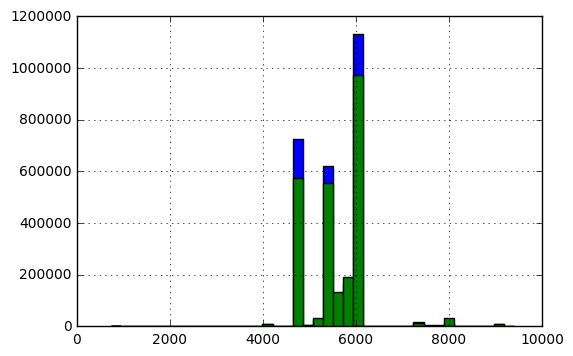

In [56]:
transactions.groupby(['gender']).mcc_code.hist(bins=40)


gender
0.0    Axes(0.125,0.125;0.775x0.775)
1.0    Axes(0.125,0.125;0.775x0.775)
Name: num_day, dtype: object

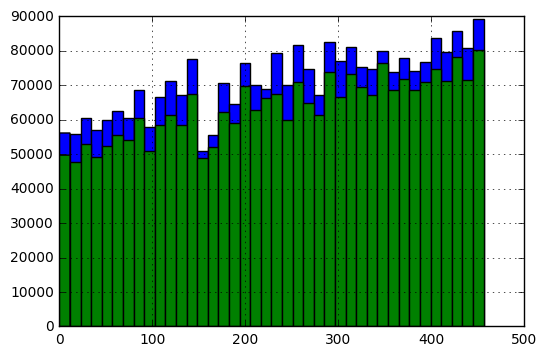

In [57]:
transactions.groupby(['gender']).num_day.hist(bins=40)

In [63]:
gender_ratio = []
for i in 
transactions[transactions.num_day==120].groupby('gender').count()

,customer_id,mcc_code,tr_type,amount,term_id,num_day,datetime,hour,minute,second
gender,,,,,,,,,,
0.0,5579,5579,5579,5579,0,5579,5579,5579,5579,5579
1.0,5336,5336,5336,5336,0,5336,5336,5336,5336,5336


0     842343
13    449586
12    443782
15    432270
14    430720
Name: hour, dtype: int64

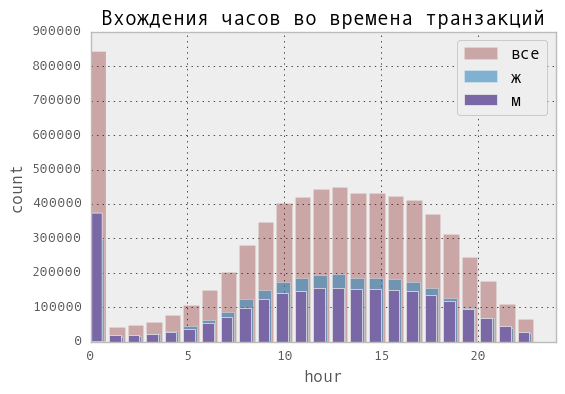

In [50]:
plt.hist(transactions.hour.values, bins=24, color='#770000', label=u'все', alpha=0.3, width=0.8) # , histtype='stepfilled', normed=True,
plt.hist(transactions[transactions.gender==0].hour.values, bins=24, label=u'ж', alpha=0.6, width=0.7)
plt.hist(transactions[transactions.gender==1].hour.values, bins=24, label=u'м', alpha=1.0, width=0.6)
plt.xlabel('hour')
plt.ylabel('count')
plt.title(u'Вхождения часов во времена транзакций')
plt.legend()
plt.xlim([0, 24])
transactions.hour.value_counts()[:5]

Выбросы для агрегаций можно эффективно обнаруживать sklearn.covariance.EllipticEnvelope 
*todo: привести пример*

### Каждый человек использует не так много кодов: ###

customer_id
6815         6
22899       11
27914        6
28753       30
31385       17
38084       37
42096       39
49101       13
49793       16
50940        7
52926       26
53395        5
70680       28
78659       10
81626       16
85327        3
85635        1
104032       3
114348      21
115617      26
117556      13
126081      23
126935      35
127946       7
137367       7
168767      26
172390      25
174467      18
177299      11
186730       8
            ..
99815733     4
99834424    25
99836889     3
99848367     6
99849205    11
99849278    26
99859464     6
99864691    11
99876778    43
99877835     7
99882949     4
99888537    14
99900908    10
99911226    14
99915912    33
99917144     5
99918216    23
99933081    12
99938948    24
99953525    13
99963907    16
99967537     2
99969946    32
99977292    13
99980396    27
99984336     5
99985917     5
99988578    28
99991245    15
99999680    26
Name: mcc_code, dtype: int64


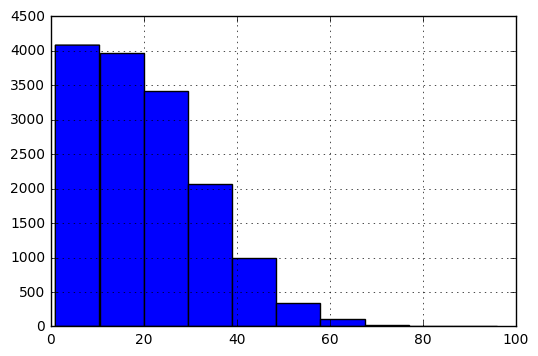

In [67]:
print(transactions.groupby('customer_id')['mcc_code'].nunique())
transactions.groupby('customer_id')['mcc_code'].nunique().hist()

Провал знаменует начало года:

314    20552
272    20368
441    20203
448    20178
425    19979
Name: num_day, dtype: int64

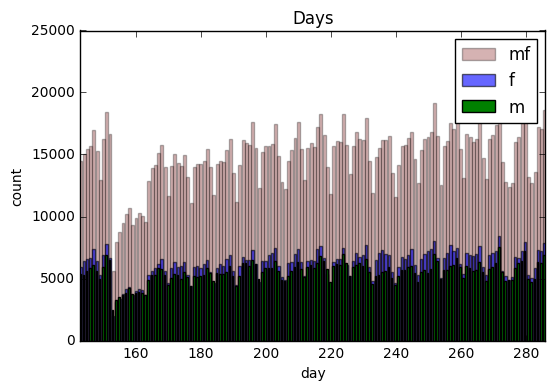

In [90]:
plt.hist(transactions.num_day.values, bins=457, color='#770000', label=u'mf', alpha=0.3, width=0.9) # , histtype='stepfilled', normed=True,
plt.hist(transactions[transactions.gender==0].num_day.values, bins=457, label=u'f', alpha=0.6, width=0.7)
plt.hist(transactions[transactions.gender==1].num_day.values, bins=457, label=u'm', alpha=1.0, width=0.5)
plt.xlabel('day')
plt.ylabel('count')
plt.title(u'Days')
plt.legend()
#plt.xlim([0, 457])
plt.xlim([153-10, 153+(120-1) + 4 + 10])
transactions.num_day.value_counts()[:5]

153 -- это начало года

тогда 153 + 68/69 -- канун 8 марта

In [91]:
transactions[transactions.num_day==153 + 69].groupby('gender').customer_id.count()

gender
0.0    6592
1.0    6151
Name: customer_id, dtype: int64

In [86]:
transactions[transactions.num_day==153 + 53].groupby('gender').customer_id.count()

gender
0.0    4895
1.0    4776
Name: customer_id, dtype: int64